# Implementing a Key-Value Database

## Introduction

In this project, our goal is to extend a BTree implementation to implement a key-value store class named KVStore. This key-value store will work as a Python dictionary, and it will be able to perform range queries.

## Importing and Initializing

In [1]:
# Import the previously created B-Tree
from btree import BTree

class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold=2)

## Overriding the Add Method

The add() method from the BTree class can add multiple entries with the same key, but we don't want to have this behavior in this new class.

To solve this,  we can create a new method with the same name inside the KVStore and it will override the one from the other class.

In [2]:
class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold=2)
    # New add method
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            return super().add(key, value)
        else:
            for index, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[index] = value  

### Testing

In [3]:
# Test if the split threshold of a KVStore equals 2
kv = KVStore()
assert kv.split_threshold == 2, 'The split is not equal to 2.'

# Test if we get the same value that was added
kv.add(1, 'same value')
assert kv.get_value(1) == 'same value', 'It doesn\'t get the same value that was added'

# Test if the value uptades when we add two entries with the same key and different values
kv.add(1, 'update')
assert kv.get_value(1) == 'update', 'It doesn\'t update entries with the same key'

## Implementing the Item Getter and Setter

We will implement those items to use bracket syntax to add entries and retrieve values.

In [4]:
class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold=2)
    # New add method
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            return super().add(key, value)
        else:
            for index, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[index] = value  
    
    # Get value by using bracket syntax
    def __getitem__(self, key):
        return self.get_value(key)
    
    # Add value by using bracket syntax
    def __setitem__(self, key, value):
        self.add(key, value)

### Testing

In [5]:
kv = KVStore()

# Set values
for key in range(0, 10):
    kv[key] = key
    
# Test set item
for key in range(0, 10):
    assert kv[key] == key, 'Wrong value'
    
# Set values with same key
for key in range(0, 10):
    kv[key] = key + 1
    
for key in range(0, 10):
    assert kv[key] == key + 1, 'Wrong value, it didn\'t update'

## Enhancing the Contains Method

Another feature of the dictionary is the use of the in operator to check whether a given key is stored.

In [6]:
class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold=2)
    # New add method
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            return super().add(key, value)
        else:
            for index, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[index] = value  
    
    # Get value by using bracket syntax
    def __getitem__(self, key):
        return self.get_value(key)
    
    # Add value by using bracket syntax
    def __setitem__(self, key, value):
        self.add(key, value)
        
    # Implement the use of in operator
    def __contains__(self, key):
        return self.contains(key)

### Testing the In Operator

In [7]:
# Add values
kv = KVStore()
for char in 'abcdfghijklmnopqrstuvwxyz':
    kv[char] = char
    
# Test if the in operator works
for char in 'abcdfghijklmnopqrst':
    assert char in kv, 'Not in the kv'

## Implementing Range Queries

We will implement the feature range queries to return all values in a range. 

In [8]:
class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold=2)
    # New add method
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            return super().add(key, value)
        else:
            for index, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[index] = value  
    
    # Get value by using bracket syntax
    def __getitem__(self, key):
        return self.get_value(key)
    
    # Add value by using bracket syntax
    def __setitem__(self, key, value):
        self.add(key, value)
        
    # Implement the use of in operator
    def __contains__(self, key):
        return self.contains(key)
    
    # Return values in a range
    def _range_query(self, range_start, range_end, current_node, min_key, max_key):
        if (max_key is not None and range_start > max_key) or (min_key is not None and range_end < min_key):
            return []
        results = []
        for i, key in enumerate(current_node.keys):
            if range_start <= key and key <= range_end:
                results.append(current_node.values[i])
        if not current_node.is_leaf():
            for i, child in enumerate(current_node.children):
                new_min_key = current_node.keys[i - 1] if i > 0 else min_key
                new_max_key = current_node.keys[i] if i < len(current_node) else max_key
                results += self._range_query(range_start, range_end, child, new_min_key, new_max_key)
        return results 

    def range_query(self, range_start, range_end):
        return self._range_query(range_start, range_end, self.root, float('-inf'), float('inf'))

### Testing Range Queries

In [9]:
# Baseline to compare results
class DictKVStore(dict):

    def range_query(self, range_start, range_end):
        result = []
        for key in self.keys():
            if range_start <= key and key <= range_end:
                result.append(self[key])
        return result
    
# Test range queries from KVStore
from random import randint

dict_kv = DictKVStore()
our_kv = KVStore()
for i in range(1000):
    key = randint(1, 1000)
    value = randint(1, 10000)
    dict_kv[value] = value
    our_kv[value] = value

for _ in range(1000):
    range_start = randint(1, 1000)
    range_end = randint(range_start, 1000)
    dict_res = sorted(dict_kv.range_query(range_start, range_end))
    our_res = sorted(our_kv.range_query(range_start, range_end))
    assert dict_res == our_res, "Data structures don't return the same range query result."

## Random Tests

Now we will test the whole implementation.

In [10]:
dict_kv = DictKVStore()
kv = KVStore()

print("Testing Insertion")
for _ in range(1000):
    key = randint(0, 1000)
    value = randint(0, 1000000)
    dict_kv[key] = value
    kv[key] = value
    
print("Testing Length")
assert len(dict_kv) == len(kv), "Wrong length. Length should be {} but is {}.".format(len(dict_kv), len(kv))
    
print("Testing Values")
for key in dict_kv:
    assert dict_kv[key] == kv[key], "Wrong value for key {}. Expected value {} but found value {}.".format(key, dict_kv[key], kv[key])

print("Testing in Operator")
for i in range(1000):
    key = randint(0, 1000)
    assert (key in dict_kv) == (key in kv), "Contains method did not return the correct value for key {}.".format(key)


print("Testing Range Queries")
for _ in range(1000):
    range_start = randint(0, 1000)
    range_end = randint(range_start, 1000)
    dict_results = dict_kv.range_query(range_start, range_end)
    kv_results = kv.range_query(range_start, range_end)
    assert len(dict_results) == len(kv_results), "Wrong number of results in range query [{}, {}]. Should be {} but was {}.".format(range_start, range_end, len(dict_results), len(kv_results))
    dict_results.sort()
    kv_results.sort()
    assert dict_results == kv_results, "The Range Queries are not the same."

Testing Insertion
Testing Length
Testing Values
Testing in Operator
Testing Range Queries


## Conclusion: Performance Testing

Lastly, we will compare the runtime of the range_query() of the DictKVStore and KVStore by loading all entries from the entries.csv file.

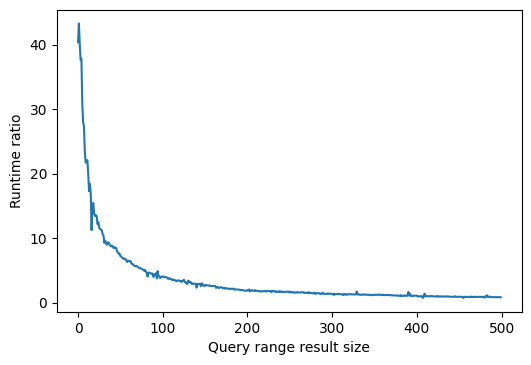

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import time

dict_kv = DictKVStore()
kv = KVStore()

# Load entries
for _ in range(50000):
    key = randint(0, 100000)
    value = randint(0, 1000000)
    dict_kv[key] = value
    kv[key] = value
    
# Measure time range queries    
range_start = 1
range_end = 1
time_ratios = []
for _ in range(500):
    start = time.time()
    dict_kv.range_query(range_start, range_end)
    end = time.time()
    time_dict = end - start

    start = time.time()
    kv.range_query(range_start, range_end)
    end = time.time()
    time_kv = end - start

    time_ratios.append(time_dict / time_kv)
    range_end += 10
    
# Plot chart
plt.plot(time_ratios)
plt.xlabel('Query range result size')
plt.ylabel('Runtime ratio')
plt.show()

For 50,000 entries, we get a performance boost of more than 40 times, and this ratio means that our KVStore implementation was more than forty times faster than DictKVStore. This performance decreases as the size of the query increases since large ranges need to iterate more entries in the tree.